In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

from modules.Table import TableUserInferface

In [7]:
amn_cols = ['hex_id', 'amenities_count', 'area', 'density', 'geometry']

tui = TableUserInferface()
tui.calc_amenities_density()
tui.amenities_density[amn_cols].to_file('./data/export_20240108/actual')

tui.change_scenario(1)
tui.calc_amenities_density()
tui.amenities_density[amn_cols].to_file('./data/export_20240108/futuro')

In [6]:
tui.amenities_density.columns

Index(['hex_id', 'amenities_count', 'centroid', 'area', 'geometry', 'density'], dtype='object')

<Axes: >

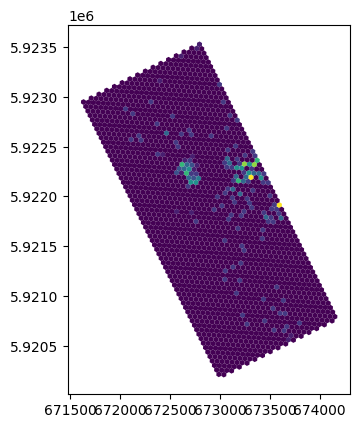

In [5]:
tui_actual.calc_bicycle_route_kpis()

In [9]:
tui_actual.calc_numeric_kpis()

In [1]:
import json
for n_scenario in [0, 1, 2]:
    bw = tui_actual.bw
    bw.go_to_scenario(n_scenario)
    linear_meters = bw.calc_linear_meters()

    qs = tui_actual.sm
    if n_scenario < 2:
        qs.go_to_scenario(n_scenario)
        quality_streets = qs.calculate_scoring()

    export = {
        "tablaSemaforo": [
            {
                "nombre": "Calles",
                "indicador1": 100*quality_streets
            },
            {
                "nombre": "Ciclovias",
                "indicador1": 100*linear_meters
            }
        ]
    }
    # Exportar el diccionario como JSON a un archivo
    scenario_name = {
        0: 'actual',
        1: 'future',
        2: 'utopic',
    }[n_scenario]
    filename = f'/app/export/numeric/{scenario_name}.json'
    with open(filename, 'w') as json_file:
        json.dump(export, json_file)

NameError: name 'tui_actual' is not defined

1.0

In [14]:
tui_actual.numeric_kpis

{'BicycleRouteMeters': 0.6315384040938987}

In [10]:
tui_actual.numeric_kpis

{'BicycleRouteMeters': 0.6315384040938987}

In [7]:
path = '/app/export/maps'
folders = [os.path.split(folder)[-1] for folder in glob(os.path.join(path, '*'))];
for combination in folders:
    folder = os.path.join(path, combination)
    tui_actual.load_heatmaps_from_folder(folder)
    tui_actual.generate_json_data()
    tui_actual.export_json_data(combination)

In [3]:
path = '/app/export/maps'
combination = '1111111'
folder = os.path.join(path, combination)
tui_actual.load_heatmaps_from_folder(folder)
tui_actual.generate_json_data()
tui_actual.export_json_data(combination)

In [ ]:
def get_changes_data(tui, mode, plate_id, scenario_id):
    output_data = {}
    if mode=='am':
        output_data['actual'] = tui.am.get_current_amenities()
        tui.am._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.am.get_current_amenities()
    elif mode=='bk':
        output_data['actual'] = tui.bk.get_current_scenario()
        tui.bk._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.bk.get_current_scenario()
    elif mode=='bl':
        output_data['actual'] = tui.bl.get_current_scenario()
        tui.bl._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.bl.get_current_scenario()
    elif mode=='ga':
        output_data['actual'] = tui.ga.get_green_areas()
        tui.ga._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.ga.get_green_areas()
    elif mode=='lu':
        output_data['actual'] = tui.lu.get_current_land_uses()
        tui.lu._update_plate_area(plate_id, scenario_id)
        output_data['update'] = tui.lu.get_current_land_uses()
    return output_data

mode = 'lu'
sel_plate = 1
scenario_id = 1

changed_data = get_changes_data(tui_actual, mode, sel_plate, scenario_id)

# tui_actual.am.get_current_amenities()
fig, ax = plt.subplots(1,2)
for idx, plate in tui_actual.plates.items():
    if idx!=sel_plate:
        plate.plot(ax=ax[0], alpha=0.5)
    else:
        plate.plot(ax=ax[0], alpha=0.5, color='red')
data = changed_data['actual']
gpd.sjoin(data, tui_actual.area_scope).plot(ax=ax[0], column='plate_id', markersize=10)
print(data.shape)

for idx, plate in tui_actual.plates.items():
    if idx!=sel_plate:
        plate.plot(ax=ax[1], alpha=0.5)
    else:
        plate.plot(ax=ax[1], alpha=0.5, color='red')

data = changed_data['update']
gpd.sjoin(data, tui_actual.area_scope).plot(ax=ax[1], column='plate_id', markersize=10)
print(data.shape)

In [ ]:
plate_id = 7
scenario_id = 1
tui_actual.update_plate_status(plate_id=plate_id, scenario_id=scenario_id)

In [ ]:
plate_id = 5
scenario_id = 1
tui_actual.update_plate_status(plate_id=plate_id, scenario_id=scenario_id)

In [ ]:
tui_futuro = TableUserInferface()
tui_futuro.change_scenario(1)
tui_futuro.calc_heatmaps_kpis()

In [ ]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['building_density'].plot(column='density', ax=ax[0])
tui_futuro.heat_maps['building_density'].plot(column='density', ax=ax[1])

In [ ]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['land_uses_diversity'].plot(column='diversity', ax=ax[0])
tui_futuro.heat_maps['land_uses_diversity'].plot(column='diversity', ax=ax[1])

In [ ]:
fig, ax = plt.subplots(1,2)
tui_actual.heat_maps['population_density'].plot(column='density', ax=ax[0])
tui_futuro.heat_maps['population_density'].plot(column='density', ax=ax[1])

In [ ]:
lu_actual = tui_actual.heat_maps['land_uses_diversity']
lu_futuro = tui_futuro.heat_maps['land_uses_diversity']
print('Diversidad de Usos de Suelo promedio actual')
print(lu_actual.loc[lu_actual['diversity'] > 0, 'diversity'].mean())
print()
print('Diversidad de Usos de Suelo promedio futuro')
print(lu_futuro.loc[lu_futuro['diversity'] > 0, 'diversity'].mean())

In [ ]:
bd_actual = tui_actual.heat_maps['building_density']
bd_futuro = tui_futuro.heat_maps['building_density']

print('Densidad de construcciones promedio actual')
print(bd_actual.loc[bd_actual['density'] > 0, 'density'].mean())
print()
print('Densidad de construcciones promedio futuro')
print(bd_futuro.loc[bd_futuro['density'] > 0, 'density'].mean())

In [ ]:
pd_actual = tui_actual.heat_maps['population_density']
pd_futuro = tui_futuro.heat_maps['population_density']

print('Densidad de población promedio actual')
print(pd_actual.loc[pd_actual['density'] > 0, 'density'].mean())
print()
print('Densidad de población promedio futuro')
print(pd_futuro.loc[pd_futuro['density'] > 0, 'density'].mean())

In [ ]:
tui_actual.save_heatmaps()
tui_futuro.save_heatmaps()